In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jinja2

In [403]:
nasos_miacrinq_1=pd.read_csv('down1.csv').dropna()
nasos_miacrinq_2=pd.read_csv('down2.csv').dropna()

In [404]:
def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)

    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    return a, b, da, db

-0.21029966621417676 +- 0.004507555120476933; 0.7922366850919736 +- 0.041316978665330274
0.0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5 & 3.0 & 4.0 & 4.5 & 5.0 & 6.0 & 7.0 & 8.0 & 8.5 & 9.0 & 9.5 & 10.0 & 10.5 & 11.0 & 11.5 & 12.0 & 12.5 & 13.0 & 13.5 & 14.0 & 15.0 & 16.0 & 17.0 & 19.0 & 21.0 & 22.0 & 25.0
2.7 & 2.5 & 2.3 & 2.1 & 2.0 & 1.8 & 1.7 & 1.5 & 1.4 & 1.3 & 1.2 & 1.1 & 1.0 & 0.96 & 0.92 & 0.85 & 0.82 & 0.79 & 0.77 & 0.75 & 0.73 & 0.71 & 0.69 & 0.67 & 0.65 & 0.64 & 0.63 & 0.6 & 0.59 & 0.58 & 0.57 & 0.56


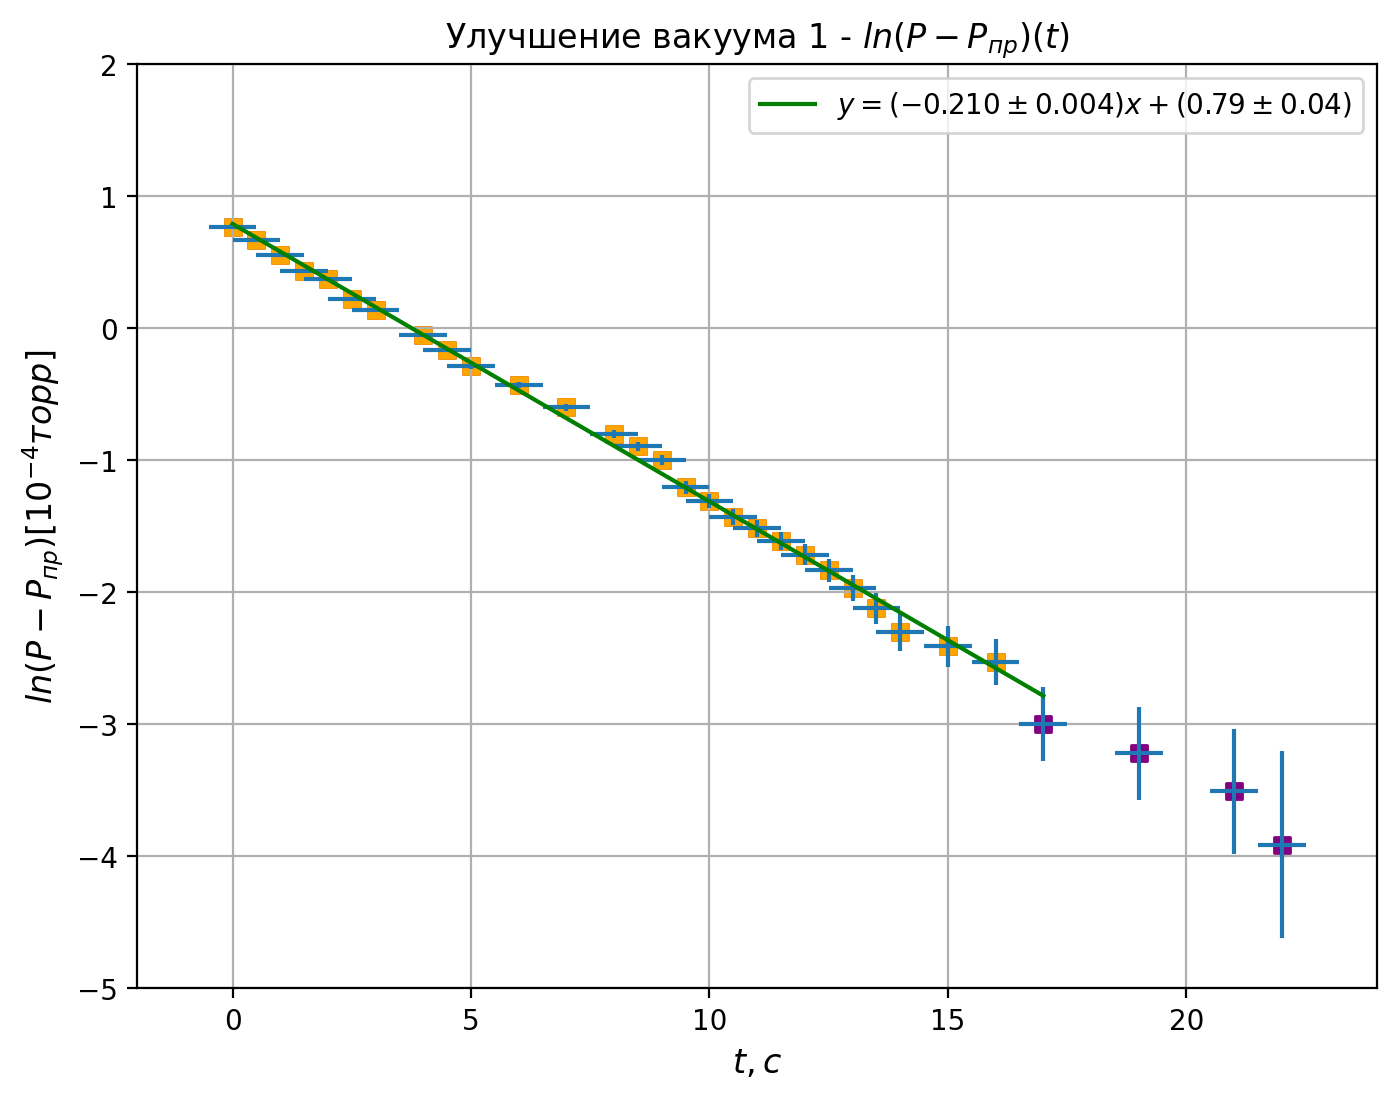

In [405]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Улучшение вакуума 1 - $ln(P-P_{пр})(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$ln(P-P_{пр})[10^{-4}торр]$", fontsize=12)


sl = slice(8, None)
t = nasos_miacrinq_1['t'][sl]; t -= t.iloc[0]
P = nasos_miacrinq_1['P'][sl]

P_pred = 0.55
dP = 0.1

X = t
dX = 0.5

Y = (P - P_pred).map(np.log)
dY = dP * np.sqrt(2) / (P - P_pred) / 10

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[:-5], Y[:-5], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[:-5], Y[:-5])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), 17])
y_mm = a*x_mm + b
ax = plt.gca()
ax.set_ylim([-5, 2])
ax.set_xlim([-2, 24])

plt.plot(x_mm, y_mm, color='green', label=r"$y=(-0.210 \pm 0.004)x+(0.79 \pm 0.04)$")
plt.legend()

plt.savefig('pictures/ccum_1.png')

print(' & '.join(list(map(str,list(t)))))
print(' & '.join(list(map(str,list(P)))))

-0.22248834099606477 +- 0.006351115345689012; 1.3020004782218306 +- 0.06291899010976776


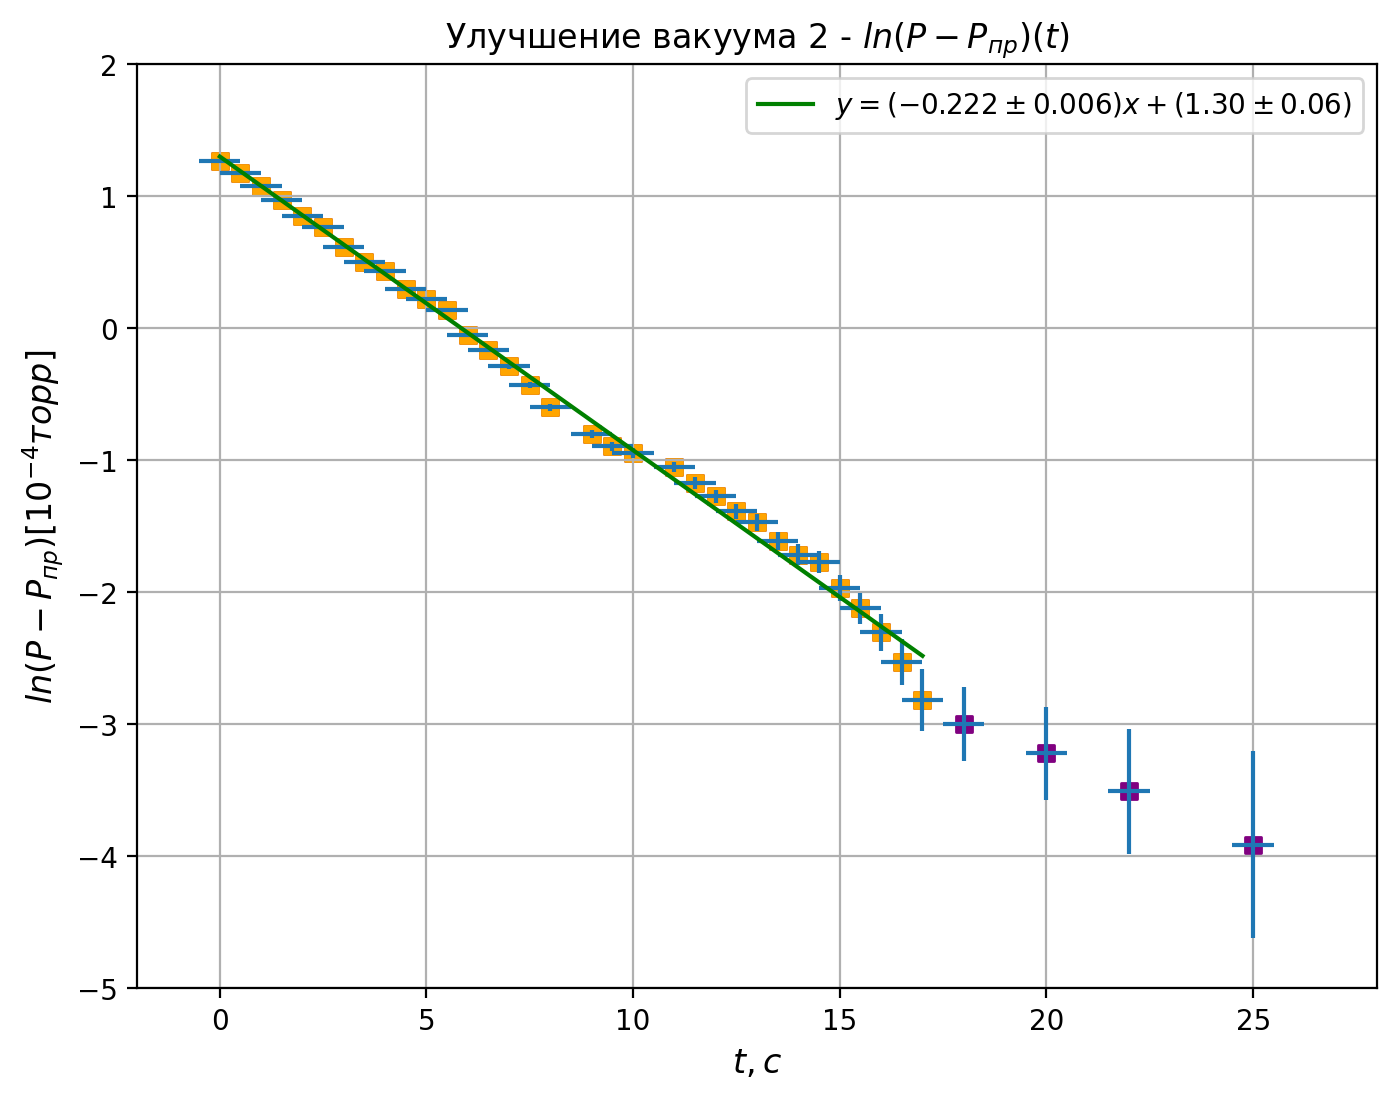

In [406]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Улучшение вакуума 2 - $ln(P-P_{пр})(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$ln(P-P_{пр})[10^{-4}торр]$", fontsize=12)


sl = slice(8, None)
t = nasos_miacrinq_2['t'][sl]; t -= t.iloc[0]
P = nasos_miacrinq_2['P'][sl]

P_pred = 0.55
dP = 0.1

X = t
dX = 0.5

Y = (P - P_pred).map(np.log)
dY = dP * np.sqrt(2) / (P - P_pred) / 10

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[:-5], Y[:-5], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')



a, b, da, db = mnk(X[:-5], Y[:-5])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), 17])

y_mm = a*x_mm + b
ax = plt.gca()
ax.set_ylim([-5, 2])
ax.set_xlim([-2, 28])

plt.plot(x_mm, y_mm, color='green', label=r"$y=(-0.222 \pm 0.006)x+(1.30 \pm 0.06)$")
plt.legend()

plt.savefig('pictures/ccum_2.png')

In [407]:
nasos_anjatecinq_1 = pd.read_csv('up1.csv').dropna()
nasos_anjatecinq_2 = pd.read_csv('up2.csv').dropna()

0.0557386752114947 +- 0.0003690403599232905; 1.0172614370414208 +- 0.014904274162721392


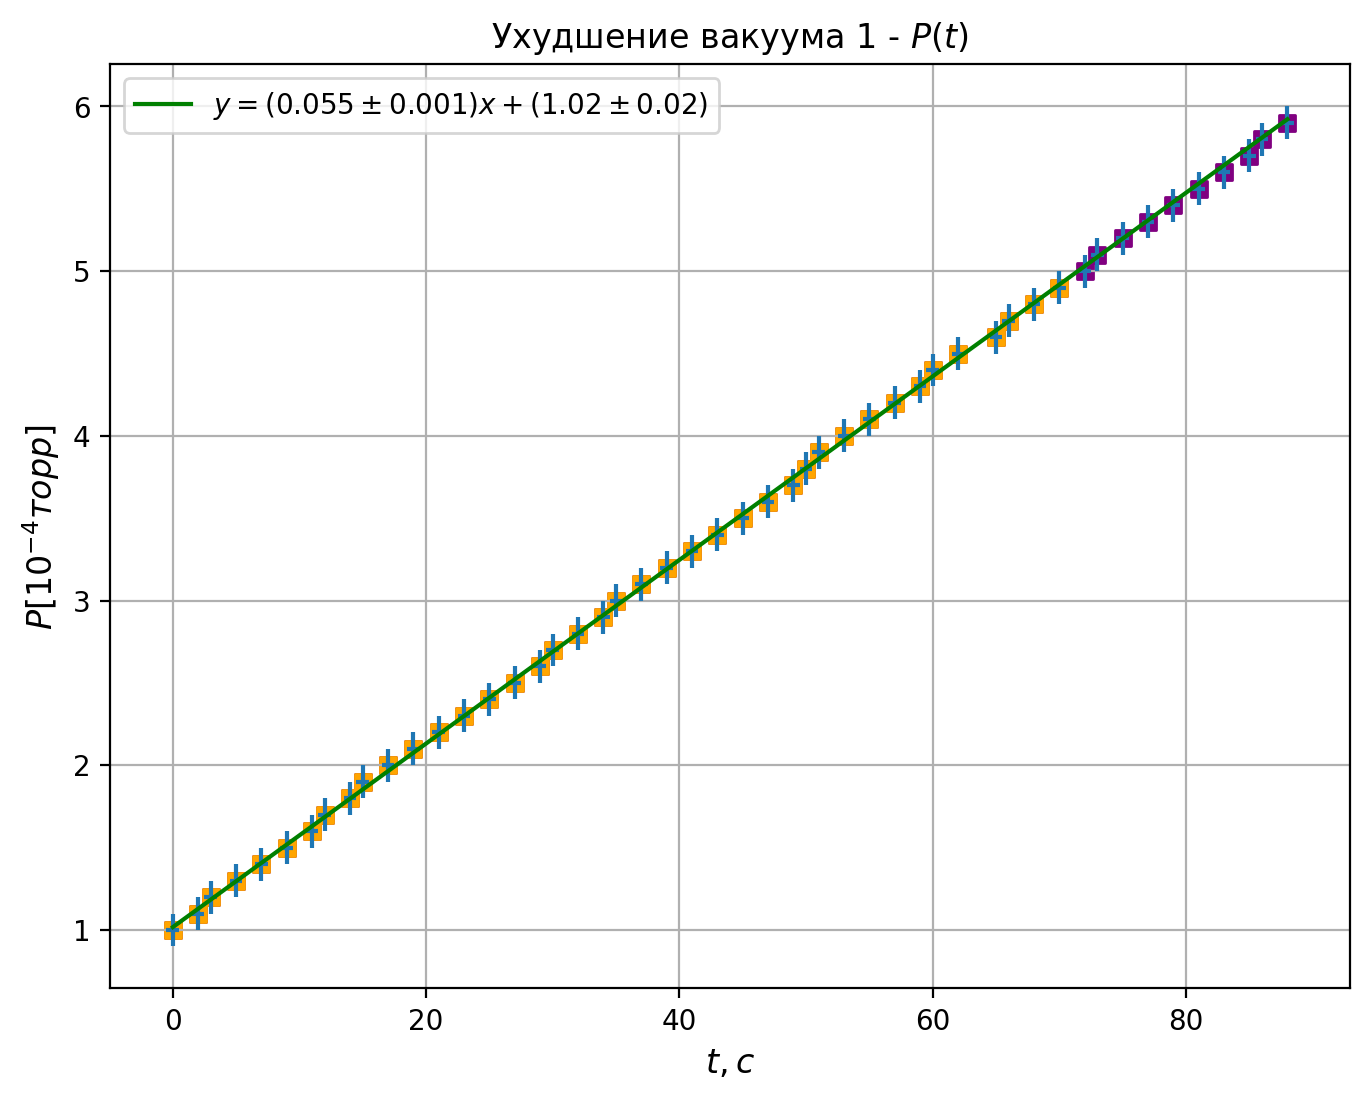

In [408]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Ухудшение вакуума 1 - $P(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$P[10^{-4}торр]$", fontsize=12)


sl = slice(0, None)
t = nasos_anjatecinq_1['t'][sl]; t -= t.iloc[0]
P = nasos_anjatecinq_1['P'][sl]

dP = 0.1

X = t
dX = 0.5

Y = P
dY = dP


mnk_sl = slice(0, 40)

plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[mnk_sl], Y[mnk_sl], color='orange', marker='s')


plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), np.max(X)])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(0.055 \pm 0.001)x+(1.02 \pm 0.02)$")
plt.legend()

plt.savefig('pictures/cccnum_1.png')

0.0498441567837601 +- 0.0006026468466664737; 0.9848941188002572 +- 0.027550420955299172


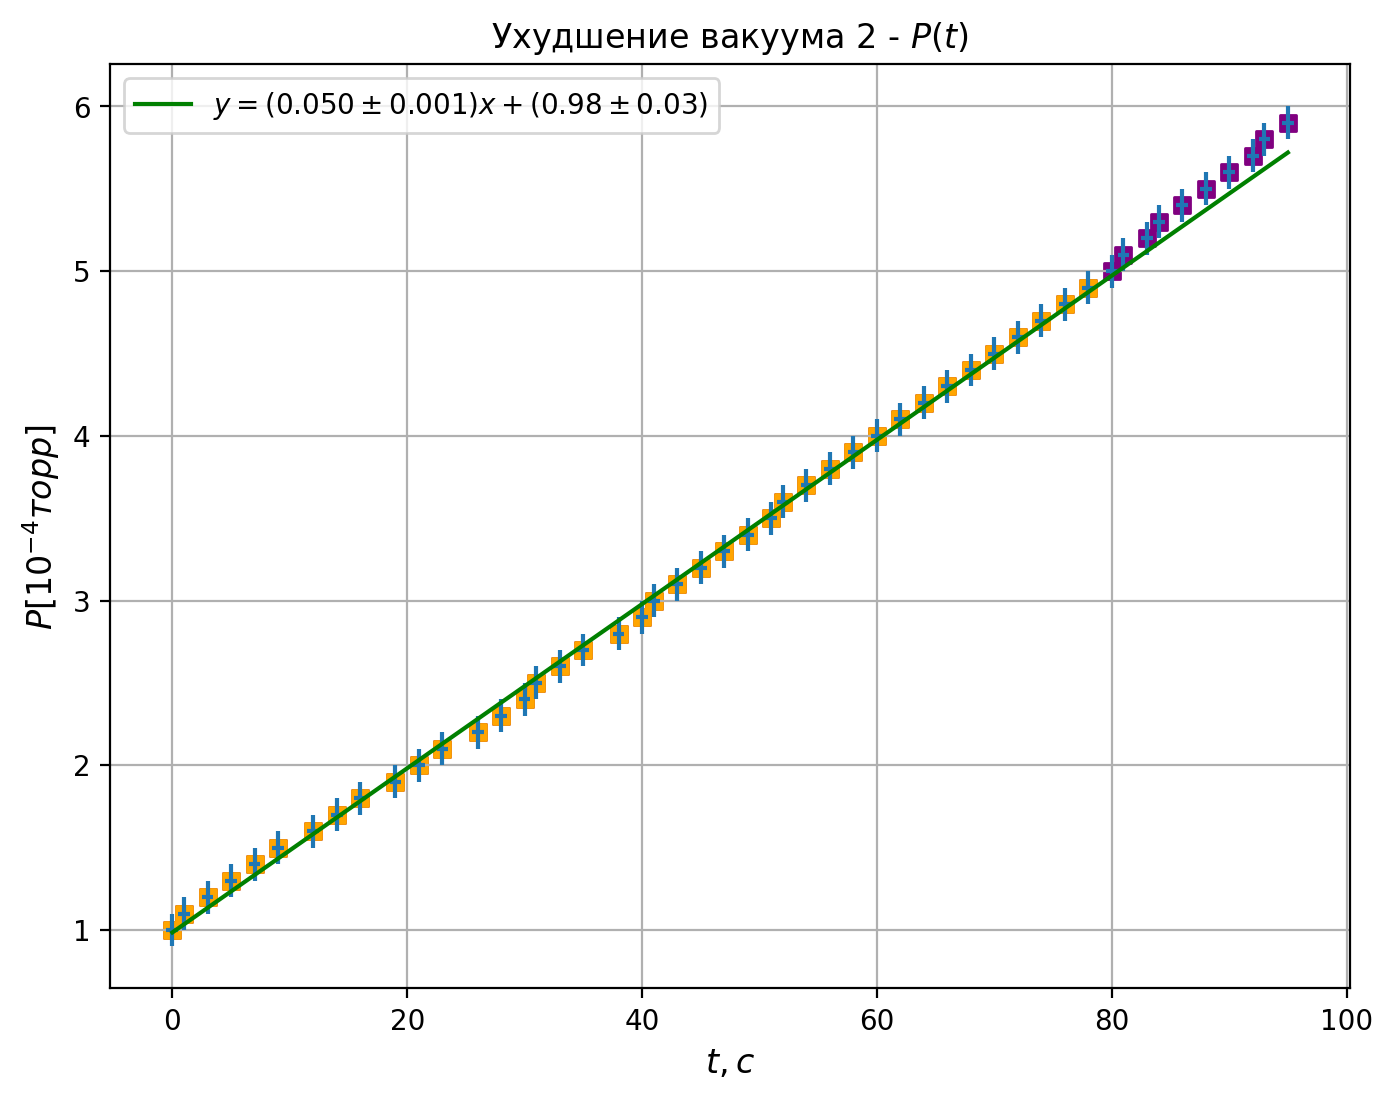

In [409]:
plt.figure(figsize=(8, 6), dpi=200)
plt.grid(True)
plt.title(r"Ухудшение вакуума 2 - $P(t)$")
plt.xlabel(r"$t, с$", fontsize=12)
plt.ylabel(r"$P[10^{-4}торр]$", fontsize=12)


sl = slice(0, None)
t = nasos_anjatecinq_2['t'][sl]; t -= t.iloc[0]
P = nasos_anjatecinq_2['P'][sl]

dP = 0.1

X = t
dX = 0.5

Y = P
dY = dP

mnk_sl = slice(0, 40)


plt.scatter(X, Y, color='purple', marker='s')
plt.scatter(X[mnk_sl], Y[mnk_sl], color='orange', marker='s')

plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='')

a, b, da, db = mnk(X[mnk_sl], Y[mnk_sl])
print(f"{a} +- {da}; {b} +- {db}")

x_mm = np.array([np.min(X), np.max(X)])
plt.plot(x_mm, a*x_mm + b, color='green', label=r"$y=(0.050 \pm 0.001)x+(0.98 \pm 0.03)$")
plt.legend()

plt.savefig('pictures/cccnum_2.png')

In [410]:
table_data = pd.DataFrame(columns=['t_1', 'uluchshenie_1', 't_2', 'uluchshenie_2', 't_3', 'uxudshenie_1', 't_4', 'uxudshenie_2'])
table_data

,t_1,uluchshenie_1,t_2,uluchshenie_2,t_3,uxudshenie_1,t_4,uxudshenie_2


In [411]:
table_data['t_1'] = nasos_miacrinq_1['t']
table_data['uluchshenie_1'] = nasos_miacrinq_1['P']

table_data['t_2'] = nasos_miacrinq_2['t']
table_data['uluchshenie_2'] = nasos_miacrinq_2['P']

table_data['t_3'] = nasos_anjatecinq_1['t']
table_data['uxudshenie_1'] = nasos_anjatecinq_1['P']

table_data['t_4'] = nasos_anjatecinq_2['t']
table_data['uxudshenie_2'] = nasos_anjatecinq_2['P']

table_data

,t_1,uluchshenie_1,t_2,uluchshenie_2,t_3,uxudshenie_1,t_4,uxudshenie_2
0,0.0,5.60,0.0,6.00,0,1.0,0,1.0
1,0.5,5.30,0.5,5.90,2,1.1,1,1.1
2,1.0,5.00,1.0,5.70,3,1.2,3,1.2
3,1.5,4.60,1.5,5.60,5,1.3,5,1.3
4,2.0,4.30,2.0,5.30,7,1.4,7,1.4
5,2.5,3.60,2.5,5.10,9,1.5,9,1.5
6,3.0,3.20,3.0,4.80,11,1.6,12,1.6
7,3.5,3.00,3.5,4.40,12,1.7,14,1.7
8,0.0,2.70,0.0,4.10,14,1.8,16,1.8
9,0.5,2.50,0.5,3.80,15,1.9,19,1.9


In [412]:
print(table_data.to_latex(index=False).replace('NaN','   ').replace('0000',''))

\begin{tabular}{rrrrrrrr}
\toprule
t_1 & uluchshenie_1 & t_2 & uluchshenie_2 & t_3 & uxudshenie_1 & t_4 & uxudshenie_2 \\
\midrule
0.00 & 5.60 & 0.00 & 6.00 & 0 & 1.00 & 0 & 1.00 \\
0.50 & 5.30 & 0.50 & 5.90 & 2 & 1.10 & 1 & 1.10 \\
1.00 & 5.00 & 1.00 & 5.70 & 3 & 1.20 & 3 & 1.20 \\
1.50 & 4.60 & 1.50 & 5.60 & 5 & 1.30 & 5 & 1.30 \\
2.00 & 4.30 & 2.00 & 5.30 & 7 & 1.40 & 7 & 1.40 \\
2.50 & 3.60 & 2.50 & 5.10 & 9 & 1.50 & 9 & 1.50 \\
3.00 & 3.20 & 3.00 & 4.80 & 11 & 1.60 & 12 & 1.60 \\
3.50 & 3.00 & 3.50 & 4.40 & 12 & 1.70 & 14 & 1.70 \\
0.00 & 2.70 & 0.00 & 4.10 & 14 & 1.80 & 16 & 1.80 \\
0.50 & 2.50 & 0.50 & 3.80 & 15 & 1.90 & 19 & 1.90 \\
1.00 & 2.30 & 1.00 & 3.50 & 17 & 2.00 & 21 & 2.00 \\
1.50 & 2.10 & 1.50 & 3.20 & 19 & 2.10 & 23 & 2.10 \\
2.00 & 2.00 & 2.00 & 2.90 & 21 & 2.20 & 26 & 2.20 \\
2.50 & 1.80 & 2.50 & 2.70 & 23 & 2.30 & 28 & 2.30 \\
3.00 & 1.70 & 3.00 & 2.40 & 25 & 2.40 & 30 & 2.40 \\
4.00 & 1.50 & 3.50 & 2.20 & 27 & 2.50 & 31 & 2.50 \\
4.50 & 1.40 & 4.00 & 2.10 & 29 & 

In [413]:
pd.DataFrame.to_latex?

Signature:
pd.DataFrame.to_latex(
    self,
    buf: 'FilePath | WriteBuffer[str] | None' = None,
    *,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | SequenceNotStr[str]' = True,
    index: 'bool_t' = True,
    na_rep: 'str' = 'NaN',
    formatters: 'FormattersType | None' = None,
    float_format: 'FloatFormatType | None' = None,
    sparsify: 'bool_t | None' = None,
    index_names: 'bool_t' = True,
    bold_rows: 'bool_t' = False,
    column_format: 'str | None' = None,
    longtable: 'bool_t | None' = None,
    escape: 'bool_t | None' = None,
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    multicolumn: 'bool_t | None' = None,
    multicolumn_format: 'str | None' = None,
    multirow: 'bool_t | None' = None,
    caption: 'str | tuple[str, str] | None' = None,
    label: 'str | None' = None,
    position: 'str | None' = None,
) -> 'str | None'
Docstring:
Render object to a LaTeX tabular, longtable, or nested table.

Requires ``\usepackage{{b